# Lab 2 – Base 64 y XOR
## Parte B: Incisos 5-9
### Jose Hernandez 20053
### Javier Mombiela 20067

#### 5. Funcion con XOR

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
from funciones.asciiToXOR import *
from funciones.calcularProbabilidad import *

5.1 Conversion de texto a binario con XOR

In [55]:
texto1 = "hola"
llave1 = "adio"
ejemplo1 = asciiToXOR(texto1, llave1)
print(f"Bytes resultantes: {ejemplo1}")

texto2 = "adios"
llave2 = "hola"
ejemplo2 = asciiToXOR(texto2, llave2)
print(f"Bytes resultantes: {ejemplo2}")

Bytes resultantes: 00001001000010110000010100001110
Bytes resultantes: 0000100100001011000001010000111000011011


5.2 Converison de bytes a texto con XOR

In [56]:
bits1 = "01011011010001110101001001011010"
llave1 = "1234"
ejemplo1 = xOrToAscii(bits1, llave1)
print(f"Texto resultante: {ejemplo1}")

bits2 = "0000010000000010000000110001001100001110"
llave2 = "alfa"
ejemplo2 = xOrToAscii(bits2, llave2)
print(f"Texto resultante: {ejemplo2}")

Texto resultante: juan
Texto resultante: enero


#### 6. Encontrar imagen original

In [57]:
def show_image(image_path):
    try:
        img = Image.open(image_path)

        plt.imshow(img)
        plt.axis('off') 
        plt.show()
    except Exception as e:
        print(f"Hubo un error al desplegar la imagen: {e}")

Imagen original

In [58]:
path = './imagenes/imagen_xor.png'
llave = 'cifrados'
show_image(path)

Hubo un error al desplegar la imagen: cannot identify image file './imagenes/imagen_xor.png'


Imagen Restaurada con clave 'cifrados'

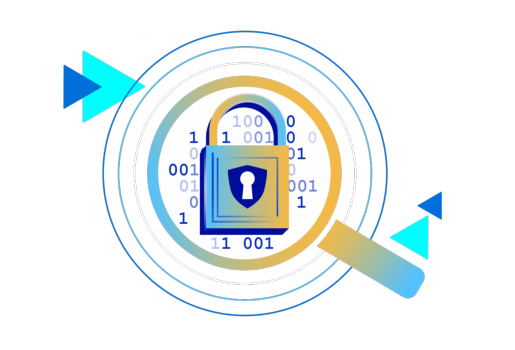

In [59]:
newPath = imageXOR(path, llave)
show_image(newPath)

#### 7. Investigación sobre corrupción de imagen con XOR

Las imágenes digitales se representan como una serie de bits, donde cada bit representa información de color. Cuando aplicamos la operación XOR a los bits de la imagen con los bits de una clave, estamos alterando esa información de color. Si la clave no es exactamente la misma cuando intentamos descifrar la imagen, los bits de color no se restaurarán a su estado original. Esto se debe a que la operación XOR es reversible solo si se aplica dos veces con el mismo valor.

Por ejemplo, si tenemos un bit de imagen que es 1 y un bit de clave que es 1, el resultado de la operación XOR sería 0. Si luego intentamos descifrar ese bit cifrado (0) con un bit de clave diferente (digamos 0), el resultado de la operación XOR sería 0, no el bit de imagen original que era 1.

Esto significa que la información de color para ese bit en particular se ha alterado permanentemente, lo que resulta en una imagen “corrupta” o alterada. En otras palabras, los colores en la imagen descifrada no coincidirán con los colores en la imagen original, lo que puede hacer que la imagen parezca distorsionada o incomprensible.

#### 8. XOr a 2 imagenes

El primer paso en el proceso de aplicar la operación XOR a dos imágenes es la selección de las imágenes. Una de las imágenes actuará como la imagen original y la otra como la clave. Es importante que ambas imágenes tengan el mismo tamaño para que la operación XOR pueda aplicarse a cada par correspondiente de píxeles.

Las imágenes digitales se representan como una serie de bits, donde cada bit representa información de color. Cada píxel de una imagen se representa típicamente con 24 bits: 8 bits para el rojo, 8 bits para el verde y 8 bits para el azul. Esta es la información que se alterará cuando apliques la operación XOR.

La operación XOR es un operador lógico que devuelve verdadero (o 1) si el número de 1s es impar, y falso (o 0) si el número de 1s es par. Cuando aplicas la operación XOR a cada par correspondiente de bits de las dos imágenes, estás “mezclando” los bits de la imagen original con los bits de la clave. Esto resulta en una imagen cifrada.

Para descifrar la imagen, se aplica la operación XOR a la imagen cifrada con la misma clave. Como la operación XOR es reversible, esto debería restaurar la imagen original. Sin embargo, si la clave utilizada para descifrar la imagen no es exactamente la misma que la original, los bits no se alinearán correctamente. Esto resultará en una imagen “corrupta” o alterada, ya que los colores en la imagen descifrada no coincidirán con los colores en la imagen original.

##### Ejemplos de XOR con dos imaganes

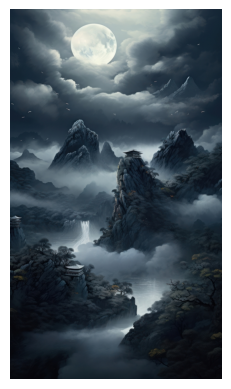

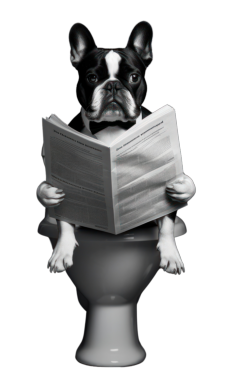

In [60]:
imagen1 = './imagenes/view.png'
imagen2 = './imagenes/dog.png'
output_path = './imagenes/viewDogXor.png'

show_image(imagen1)
show_image(imagen2)

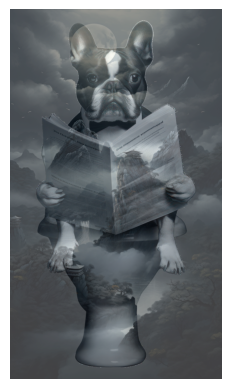

In [61]:
imagesXOR(imagen1, imagen2, output_path)
show_image(output_path)

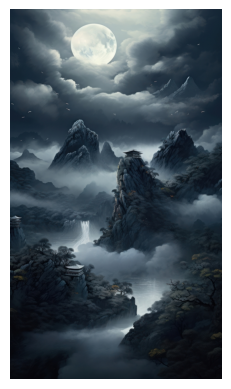

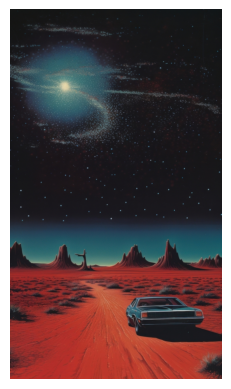

In [62]:
imagen1 = './imagenes/view.png'
imagen2 = './imagenes/car.png'
output_path = './imagenes/viewCarXor.png'

show_image(imagen1)
show_image(imagen2)

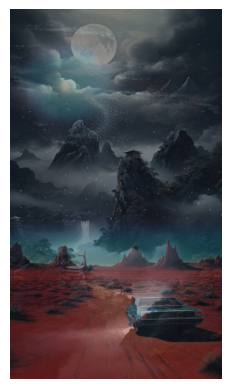

In [63]:
imagesXOR(imagen1, imagen2, output_path)
show_image(output_path)

#### 9. Distribucion de probabilidad de ocurrencia de bits
9.1 Probabilidad de ocurrencia de bits

In [64]:
texto = "hola mundo"
llave = "adios"

bits = asciiToXOR(texto1, llave1)
print(f"Bytes resultantes: {bits}")
print(f"Largo de la cadena: {len(bits)}")
print(f"Frecuencia de 1: {bits.count('1')}")
print(f"Frecuencia de 0: {bits.count('0')}")

Bytes resultantes: 01011001010111010101111101010101
Largo de la cadena: 32
Frecuencia de 1: 19
Frecuencia de 0: 13


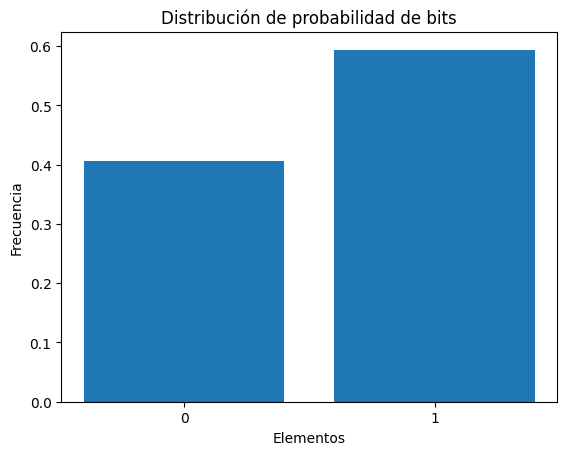

In [65]:
distProbBits = calcularDistProbBits(bits)
mostrar_histograma(distProbBits, 'Distribución de probabilidad de bits')

9.2 Probabilidad de ocurrencia de bigramas

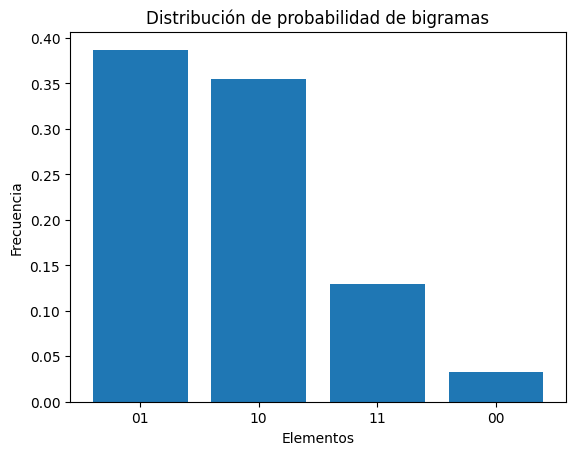

In [66]:
distProbBigramas = calcularDistProbBigramas(bits)
mostrar_histograma(distProbBigramas, 'Distribución de probabilidad de bigramas')

9.3 Probabilidad de ocurrencia de trigramas

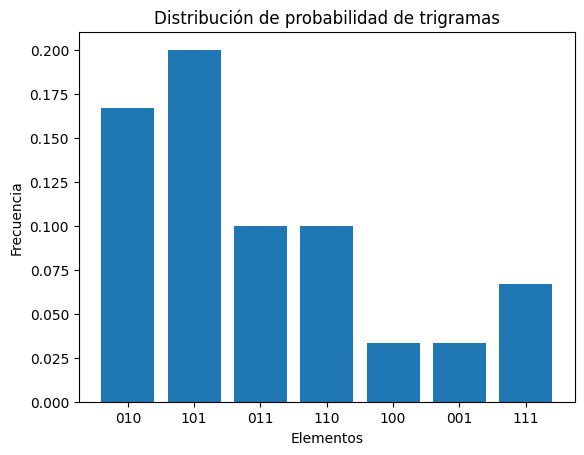

In [67]:
distProbTrigramas = calcularDistProbTrigramas(bits)
mostrar_histograma(distProbTrigramas, 'Distribución de probabilidad de trigramas')

9.4 ¿Qué ocurre con la distribución de probabilidades?

En general, a la hora de pasar de bits a bigramas a trigramas, estamos considereando patrones de datos mas largos, lo que puede llevar a cambios significativos en la distribucion de probabilidad y revelar infomracion mas detallada sobre la estructura de datos. 

**De bits a bigramas:**
- Al agrupar los bits en bigramas, vemos que la distribución de probabilidad cambia significativamente. Por ejemplo, si tenemos una distribución uniforme de bits (0.5 para '0' y 0.5 para '1'), al agruparlos en bigramas, obtenemos una distribución donde algunos bigramas son más probables que otros. Esto se debe a que ciertos patrones de bits pueden aparecer con más frecuencia que otros en la secuencia dada.

**De bigramas a trigramas:**
- Al pasar de bigramas a trigramas, la distribución de probabilidad sigue cambiando. Ahora estamos considerando secuencias de tres bits consecutivos en lugar de dos. Esto puede revelar aún más patrones en los datos y, por lo tanto, las probabilidades de los trigramas pueden ser diferentes de las de los bigramas. En el ejemplo proporcionado, podemos ver que ciertos trigramas tienen una probabilidad más alta que otros, lo que indica que ciertos patrones de tres bits son más comunes en la secuencia dada.